<a href="https://colab.research.google.com/github/Neethu-Suman/python_world/blob/main/Business_Case_LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [ ]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921 -O LoanTap.csv

--2023-09-13 12:46:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.176, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [text/plain]
Saving to: ‘LoanTap.csv’

LoanTap.csv         100%[===================>]  95.70M   125MB/s    in 0.8s    

2023-09-13 12:46:23 (125 MB/s) - ‘LoanTap.csv’ saved [100353395/100353395]



In [ ]:
df=pd.read_csv('LoanTap.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Initial Observation

In [ ]:
# Shape of the dataset -
print("No. of rows : ", df.shape[0])
print("No. of columns : ", df.shape[1])

No. of rows :  396030
No. of columns :  27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.nunique() #Number of unique values for each feature

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173106
emp_length                  12
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48818
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

#Univariate/Bivariate Analysis
## All the numerical variables

<ipython-input-58-93892805952a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'),annot=True, cmap='viridis')


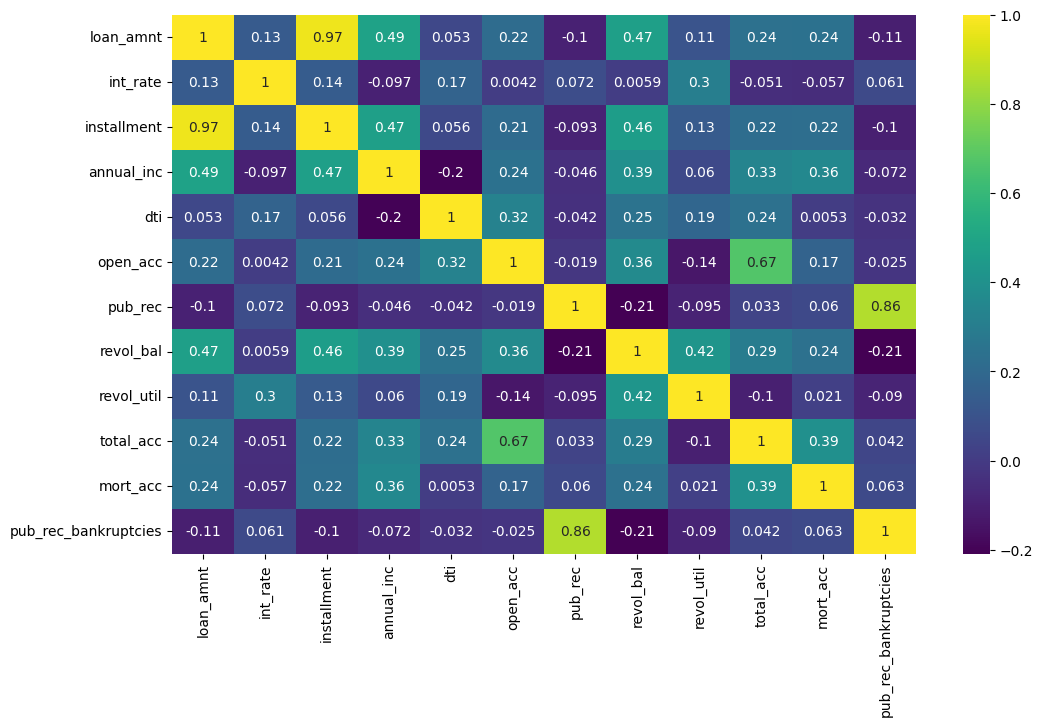

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(method='spearman'),annot=True, cmap='viridis')
plt.show()

There is a high correlation between installment and loan amount. Except for the above, there is not much correlation between features

In [ ]:
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)

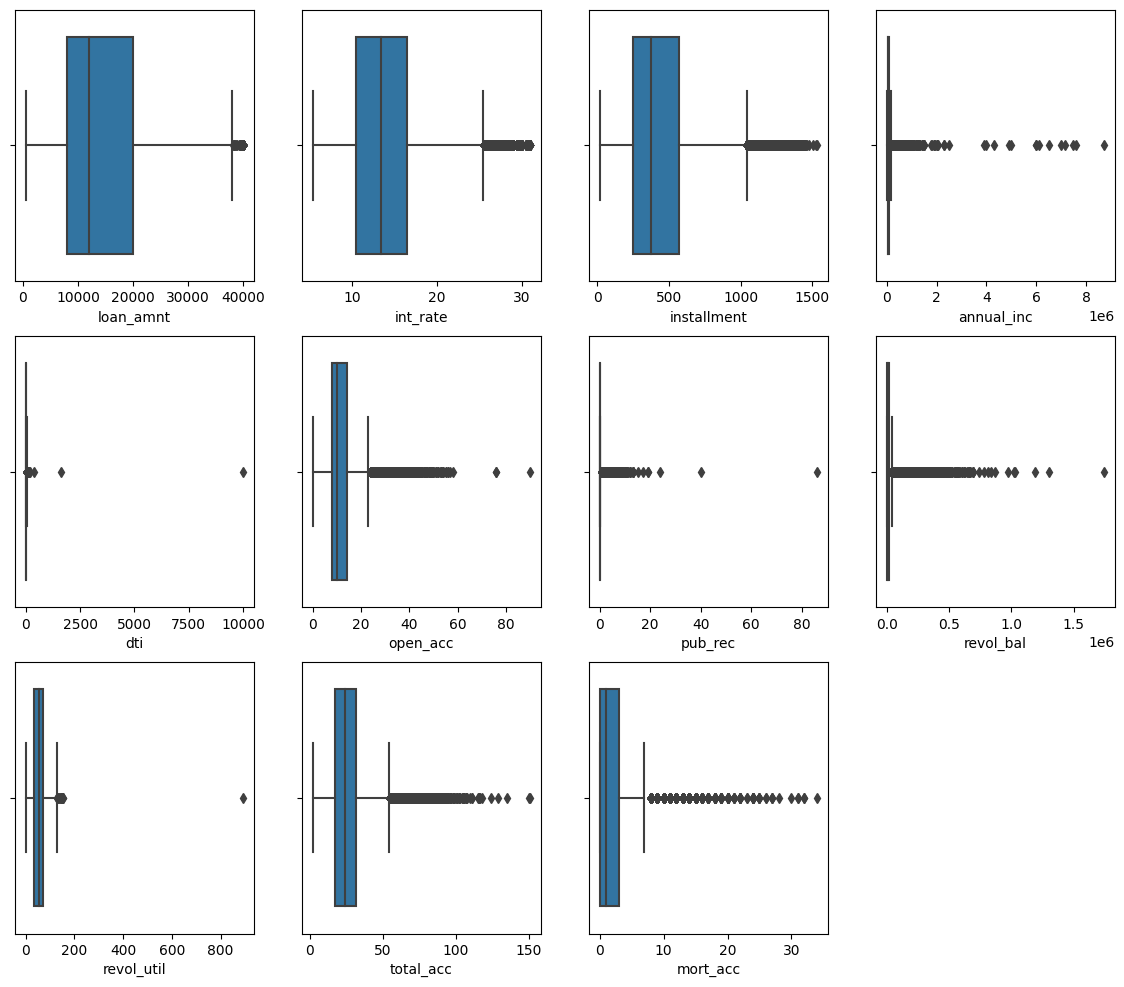

In [ ]:
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)):
    plt.subplot(3,4, plot)
    sns.boxplot(x=df[num_cols[plot-1]])

plt.show()
# All attributes have outliers

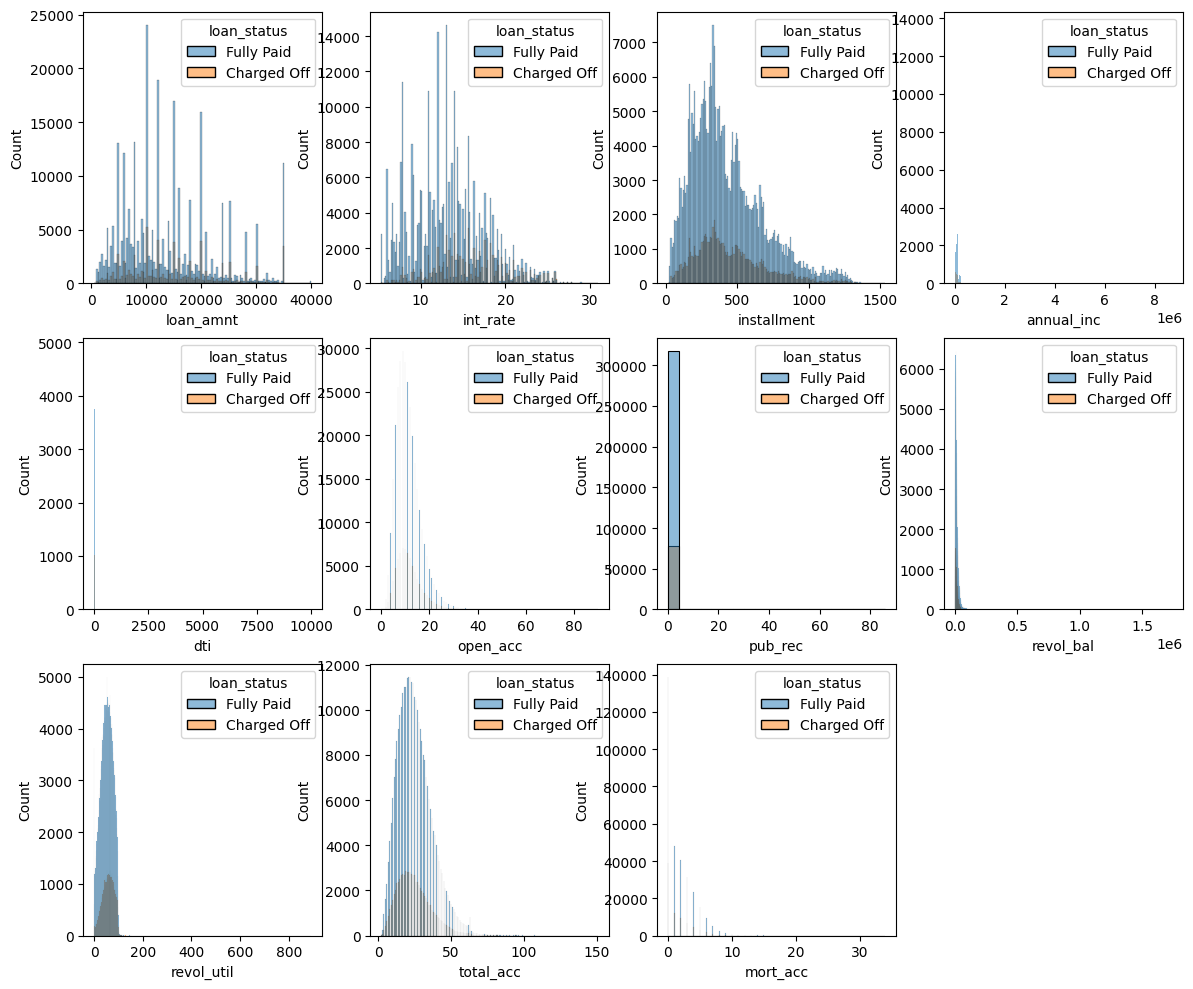

In [ ]:
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)):
    plt.subplot(3,4, plot)
    sns.histplot(x = df[num_cols[plot-1]],hue = df['loan_status'] )

plt.show()
# All attributes have outliers

Installment, pub_rec,  revol_util and total_acc features can be used to classify the loan status

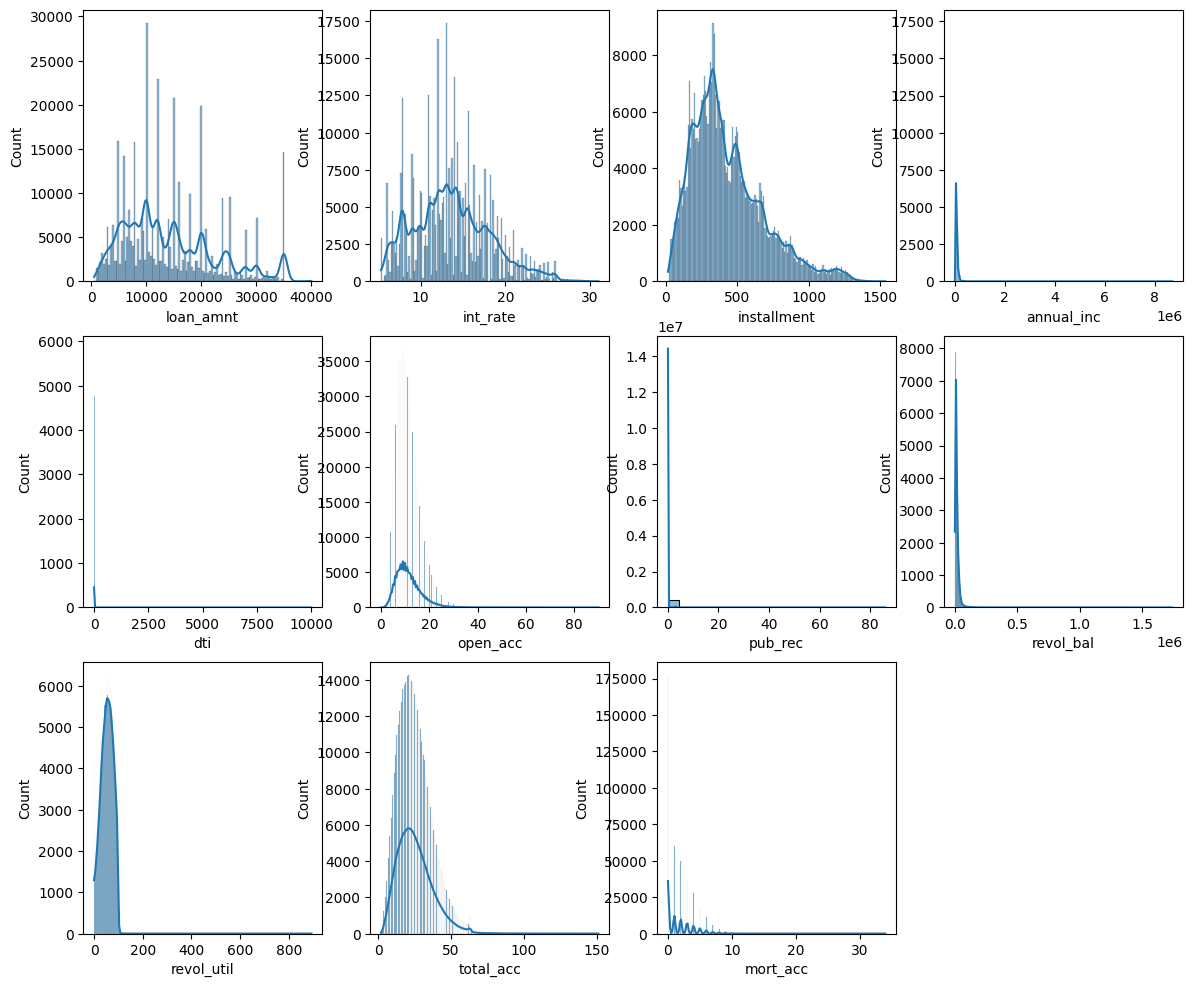

In [ ]:
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)):
    plt.subplot(3,4, plot)
    sns.histplot(x = df[num_cols[plot-1]])

plt.show()

Most of the feature follow normal distribution

In [ ]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,396030,396030,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030,396030,396030.000000,396030.000000,396030
unique,NaN,2,NaN,NaN,7,35,173106,12,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,No Employee Title,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,22927,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.754260,25.414744,NaN,NaN,1.640873,0.121483,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.484857,11.886991,NaN,NaN,2.111249,0.355962,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
def dist_check(df, col_name):
  print("Unique values : ", df[col_name].unique())
  print("Value counts : ")
  print(df[col_name].value_counts())

In [ ]:
for col in cat_cols:
  print(col, " -")
  print(df[col].value_counts())
  print("\n")

term  -
 36 months    302005
 60 months     94025
Name: term, dtype: int64


grade  -
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


sub_grade  -
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64


emp_title  -
No Employee Title          22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist     

Categorial data details
1. term   - 35
  * 36 months    - 302005
 * 60 months -      94025

2. grade  - 7
* B    - 116018
* C    - 105987
* A -     64187
*D -     63524
* E -      31488
* F -      11772
* G -      3054

3. sub_grade  - 35
* B3    26655
* B4    25601
* C1    23662
*C2    22580
* B2    22495
*B5    22085
*C3    21221
*C4    20280
*B1    19182
*A5    18526
*C5    18244
*D1    15993
*A4    15789
*D2    13951
*D3    12223
*D4    11657
*A3    10576
*A1     9729
*D5     9700
*A2     9567
*E1     7917
*E2     7431
*E3     6207
*E4     5361
*E5     4572
*F1     3536
*F2     2766
*F3     2286
*F4     1787
*F5     1397
*G1     1058
*G2      754
*G3      552
*G4      374
*G5      316

4. emp_title  -
* No Employee Title          22927
* Teacher                     4389
* Manager                     4250
* Registered Nurse            1856
* RN                          1846
* Postman                        1
* McCarthy & Holthus, LLC        1
* jp flooring                    1
* Histology Technologist         1
* Gracon Services, Inc           1

5. emp_length  
* 10+ years      126041
* 2 years         35827
* < 1 year        31725
* 3 years         31665
* 5 years         26495
* 1 year          25882
* 4 years         23952
* 6 years         20841
* 7 years         20819
* 8 years         19168
* Unavailable     18301
* 9 years         15314

6. home_ownership  
* MORTGAGE    198348
* RENT        159790
* OWN          37746
* OTHER          112
* NONE            31
* ANY              3

7. verification_status  
* Verified           139563
* Source Verified    131385
* Not Verified       125082

8. issue_d  
* Oct-2014    14846
* Jul-2014    12609
* Jan-2015    11705
* Dec-2013    10618
* Nov-2013    10496
            ...  
* Jul-2007       26
* Sep-2008       25
* Nov-2007       22
* Sep-2007       15
* Jun-2007        1

9. loan_status  -
* Fully Paid     318357
* Charged Off     77673

10. purpose  -
* debt_consolidation    234507
* credit_card            83019
* home_improvement       24030
* other                  21185
* major_purchase          8790
* small_business          5701
* car                     4697
* medical                 4196
* moving                  2854
* vacation                2452
* house                   2201
* wedding                 1812
* renewable_energy         329
* educational              257

11.title  -
* Debt consolidation            152472
* Credit card refinancing        51487
* Home improvement               15264
* Other                          12930
* Debt Consolidation             11608
                               ...  
* Graduation/Travel Expenses         1
* Daughter's Wedding Bill            1
* gotta move                         1
* creditcardrefi                     1
* Toxic Debt Payoff                  1


12. earliest_cr_line  -
* Oct-2000    3017
* Aug-2000    2935
* Oct-2001    2896
* Aug-2001    2884
*Nov-2000    2736
            ...
* Jul-1958       1
* Nov-1957       1
* Jan-1953       1
* Jul-1955       1
* Aug-1959       1

13. initial_list_status  -
* f    238066
* w    157964

14. application_type  -
* INDIVIDUAL    395319
* JOINT            425
* DIRECT_PAY       286

15. address  -
* USCGC Smith\r\nFPO AE 70466                           8
* USS Johnson\r\nFPO AE 48052                           8
* USNS Johnson\r\nFPO AE 05113                          8
* USS Smith\r\nFPO AP 70466                             8
* USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
* 455 Tricia Cove\r\nAustinbury, FL 00813               1
* 7776 Flores Fall\r\nFernandezshire, UT 05113          1
* 6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
* 8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
* 787 Michelle Causeway\r\nBriannaton, AR 48052         1


In [ ]:
for col in num_cols:
  print(col, " -")
  print(df[col].value_counts())
  print("\n")

loan_amnt  -
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: loan_amnt, Length: 1397, dtype: int64


int_rate  -
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: int_rate, Length: 566, dtype: int64


installment  -
327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
364.37       1
1015.29      1
398.04       1
544.94       1
572.44       1
Name: installment, Length: 55706, dtype: int64


annual_inc  -
60000.00    15313
50000.00    13303
65000.00    11333
70000.00    10674
40000.00    10629
            ...  
72179.00        1
50416.00        1
46820.80        1
10368.00        1
31789.88        1
Name: annual_inc, Length: 27197, dtype: int64


dti  -
0.00     313
14.40    310
19.20    30

In [ ]:
df[cat_cols].nunique() #categorical feature details

term                        2
grade                       7
sub_grade                  35
emp_title              173106
emp_length                 12
home_ownership              6
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48818
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

In [ ]:
df[num_cols].nunique() #numerical feature details

loan_amnt                1397
int_rate                  566
installment             55706
annual_inc              27197
dti                      4262
open_acc                   61
pub_rec                    20
revol_bal               55622
revol_util               1226
total_acc                 118
mort_acc                   33
pub_rec_bankruptcies        9
dtype: int64

In [ ]:
#Get stats of categorical variables
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,2,7,35,173106,12,6,3,115,2,14,48818,684,2,3,393700
top,36 months,B,B3,No Employee Title,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,22927,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


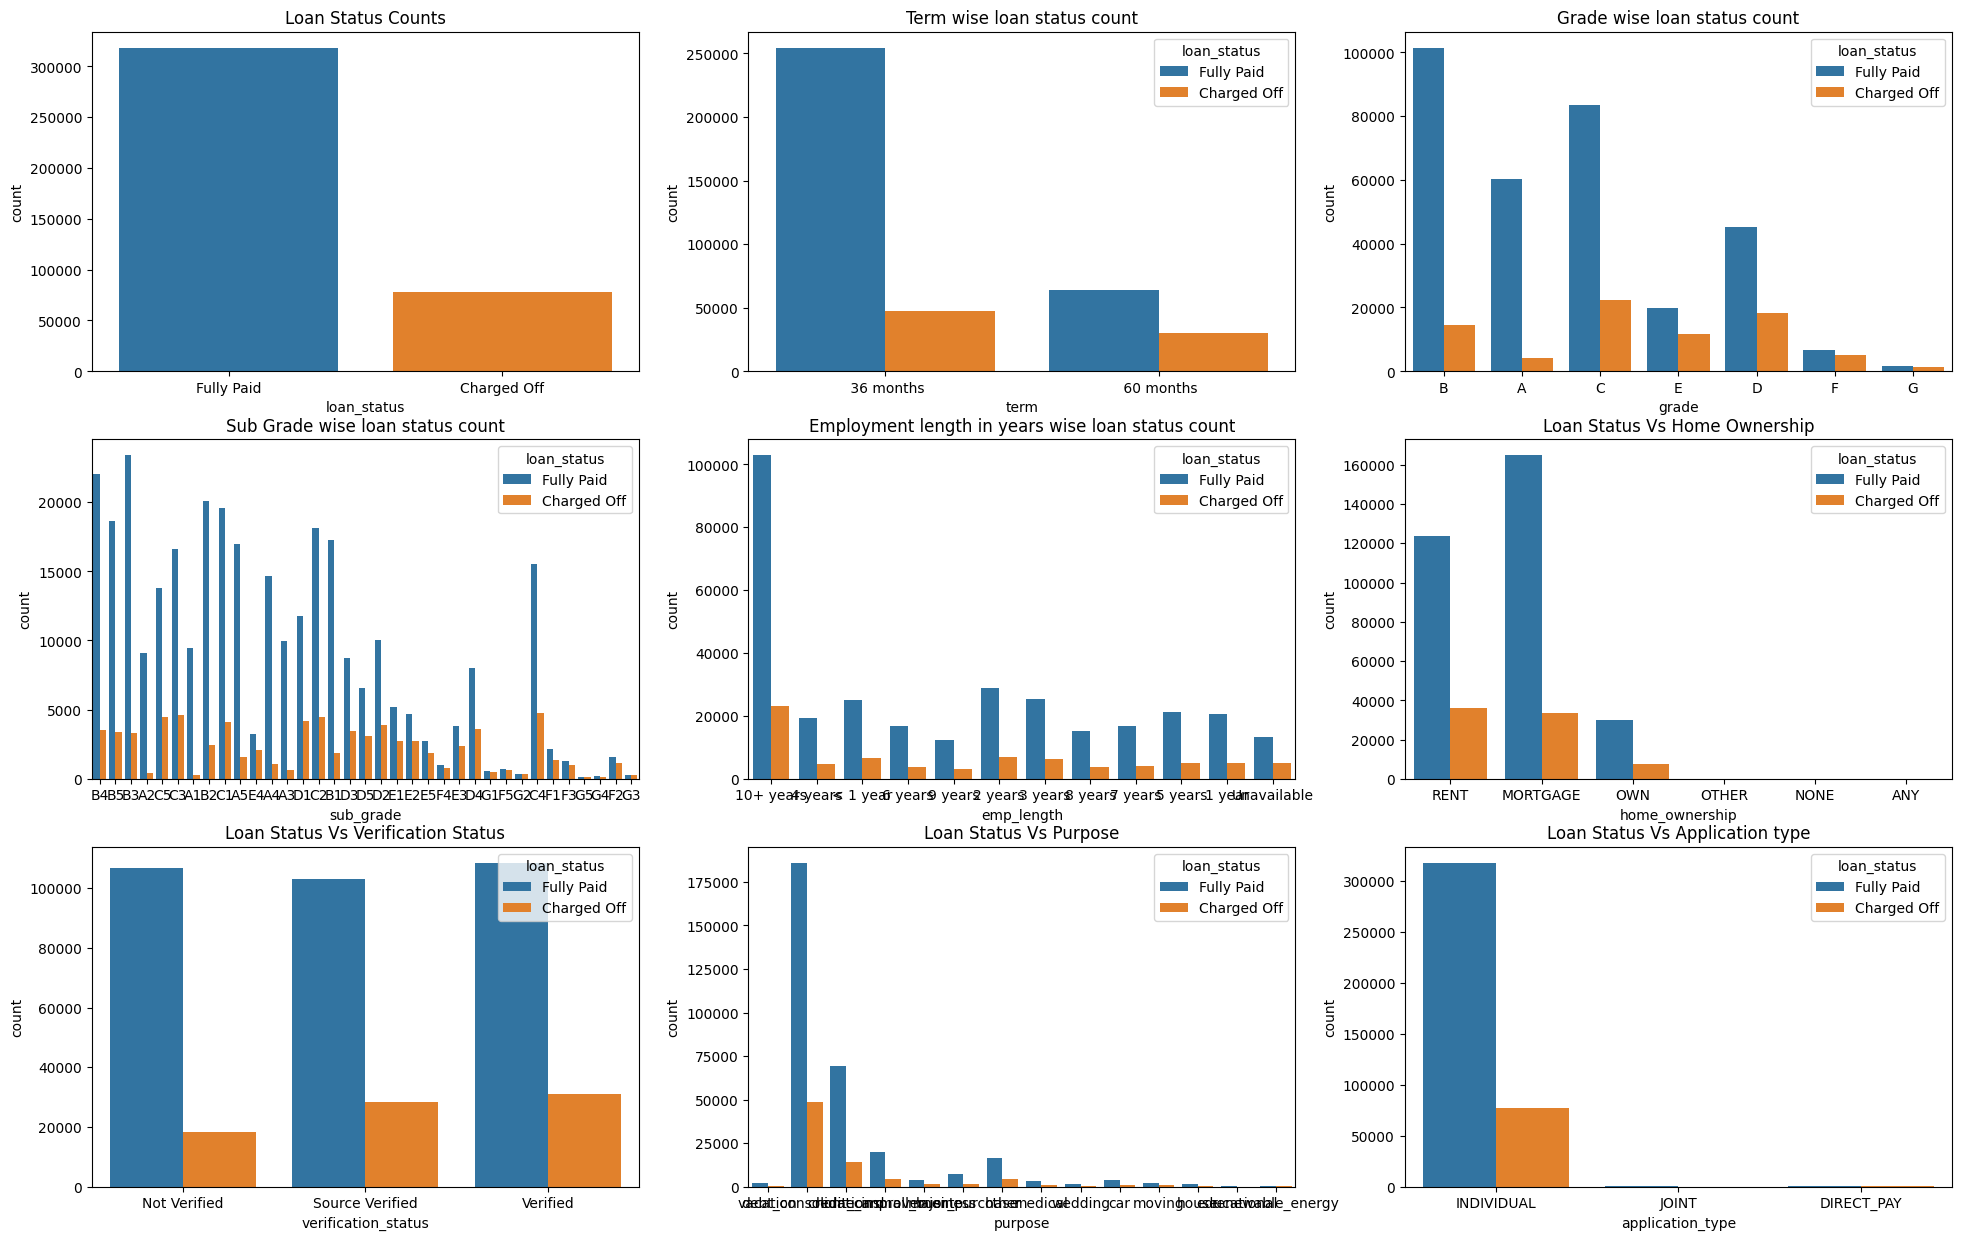

In [ ]:
#Countplots of various categorical features w.r.t. to target variable loan_status
plt.figure(figsize=(24,15))
plt.subplot(3,3,1)
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Counts')
plt.subplot(3,3,2)
sns.countplot(data=df, x='term', hue='loan_status')
plt.title('Term wise loan status count')
plt.subplot(3,3,3)
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Grade wise loan status count')
plt.subplot(3,3,4)
sns.countplot(data=df, x='sub_grade', hue='loan_status')
plt.title('Sub Grade wise loan status count')
plt.subplot(3,3,5)
sns.countplot(data=df, x='emp_length', hue='loan_status')
plt.title('Employment length in years wise loan status count')
plt.subplot(3,3,6)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Loan Status Vs Home Ownership')
plt.subplot(3,3,7)
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Loan Status Vs Verification Status')
plt.subplot(3,3,8)
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.title('Loan Status Vs Purpose')
plt.subplot(3,3,9)
sns.countplot(data=df, x='application_type', hue='loan_status')
plt.title('Loan Status Vs Application type')
plt.show()

In [ ]:
(df['purpose'].value_counts()[0]+df['purpose'].value_counts()[1]+df['purpose'].value_counts()[2]+df['purpose'].value_counts()[3])/len(df)*100

91.59432366234881

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [ ]:
df['application_type'].value_counts()[0]/len(df)*100

99.82046814635255

Observation:
* The loan fully paid percentage is high for 36 months then for 60 months. So its better to give 36 months repayment duration
*   First four grade (A,B,C,D) has the major category of loan borrower
* Sub grade category has not must influence on loan status
* "Rent" and mortgage" are major home ownership category
* Vertification status has no influence on the loan status
* 91.6% of purpose of loan includes debt_consolidation, credit_card, home_improvement, other category
* 99.8% of application type is individual
* 10+ years employment category people contributed to major share of fully paid loan category

So the categorial features term, grade, home ownership, verification, purpose,employment years fluence the loan status



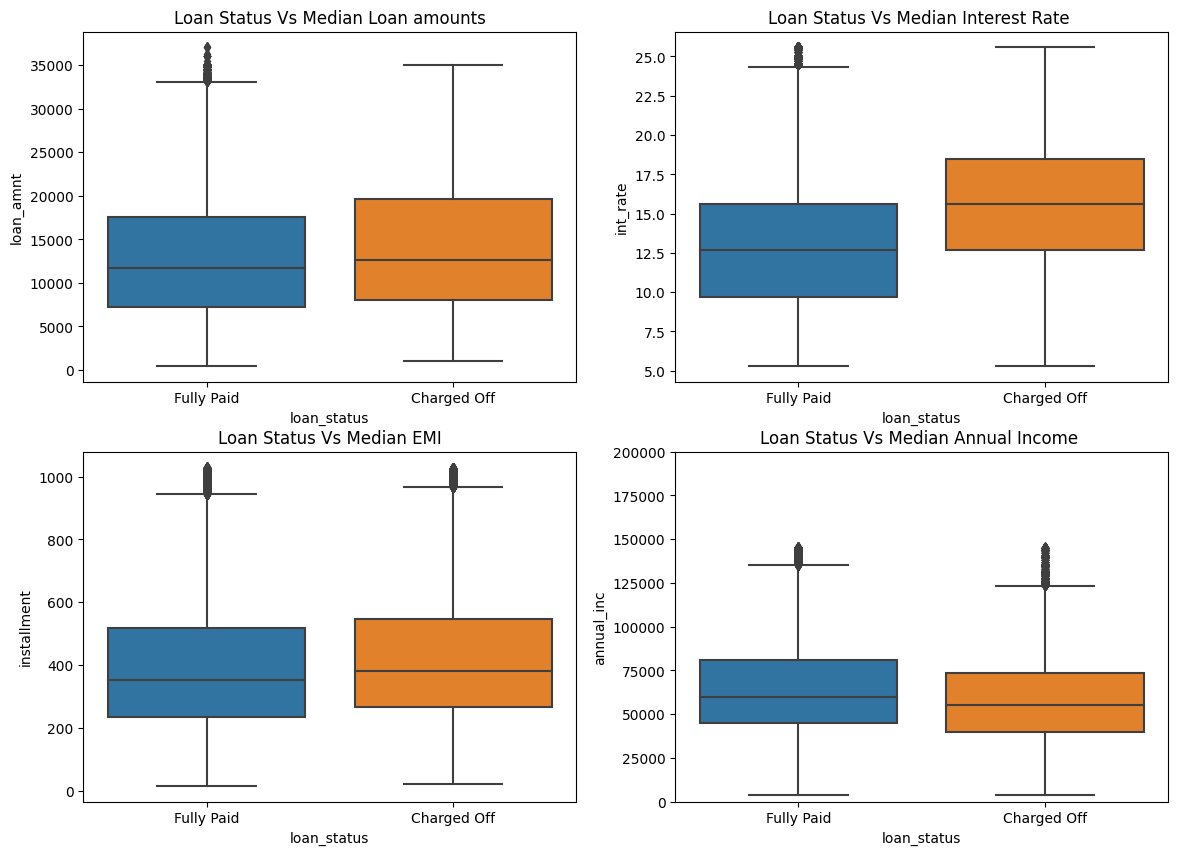

In [ ]:
#Boxplot of various cont. features w.r.t. target variable loan_status
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Status Vs Median Loan amounts')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Loan Status Vs Median Interest Rate ')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='loan_status', y='installment')
plt.title('Loan Status Vs Median EMI')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='loan_status', y='annual_inc')
plt.ylim(bottom=0, top=200000)
plt.title('Loan Status Vs Median Annual Income ')
plt.show()

Observation:

* Median interest rate of Charged Off customers is significantly higher than those of Fully Paid
* Median annual income of Charged Off customers is lower than those of Fully Paid. So annual income feature can be used to classify the loan status
* Median EMI of Charged Off is higher than those of Fully Paid
* Median loan amount of Charged Off is higher than those of Fully Paid

Text(0.5, 1.0, 'Loan Status Vs Initial List Status')

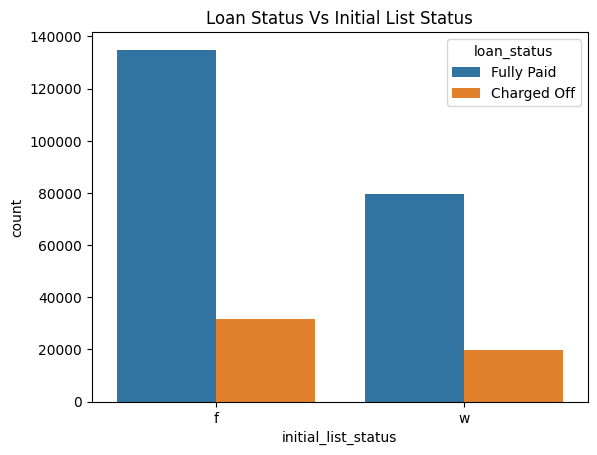

In [ ]:
sns.countplot(data=df, x='initial_list_status', hue='loan_status')
plt.title('Loan Status Vs Initial List Status')
# There is a significant difference in the "initial_list_status" feature value with respect to loan status. So it can be used to classify the loan status

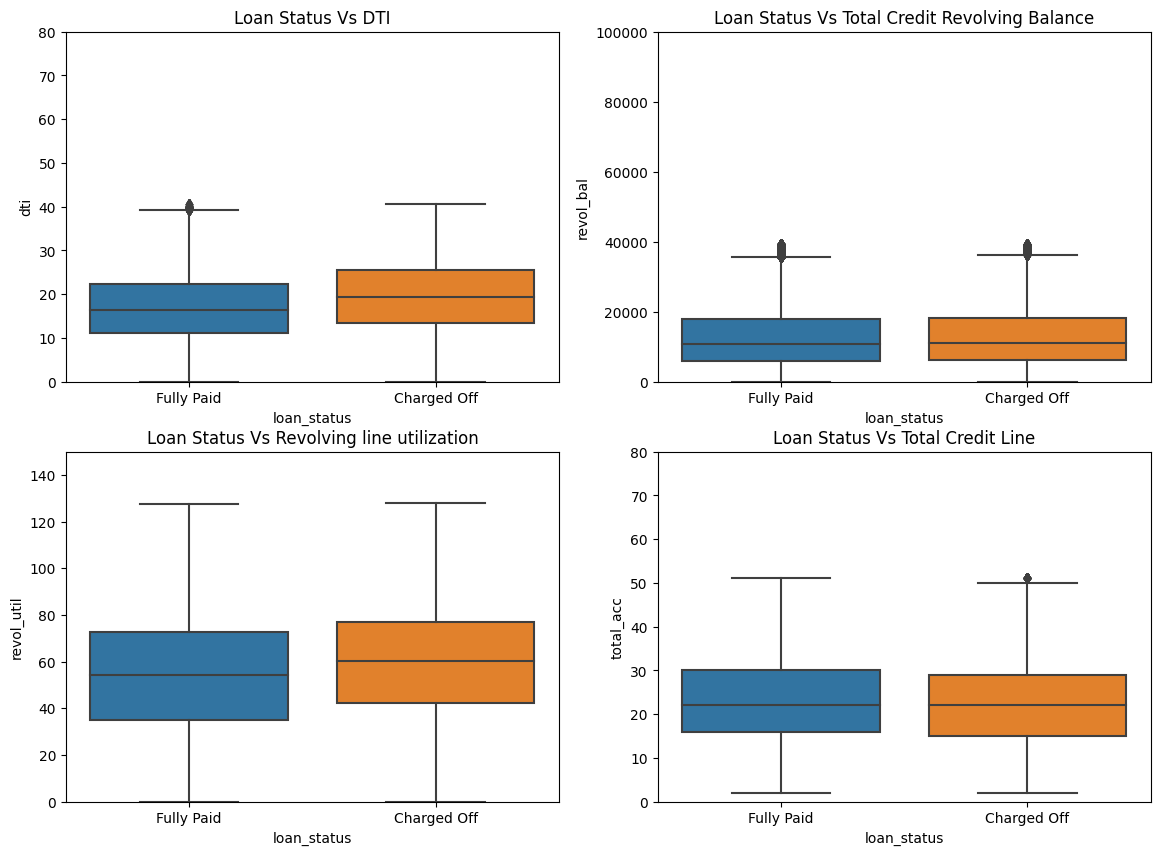

In [ ]:
#Box plot of various cont. features w.r.t. target variable loan_status

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='loan_status', y='dti')
plt.ylim(bottom=0,top=80)
plt.title('Loan Status Vs DTI')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='loan_status', y='revol_bal')
plt.ylim(bottom=0, top=100000)
plt.title('Loan Status Vs Total Credit Revolving Balance')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='loan_status', y='revol_util')
plt.ylim(bottom=0,top=150)
plt.title('Loan Status Vs Revolving line utilization')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='loan_status', y='total_acc')
plt.ylim(bottom=0, top=80)
plt.title('Loan Status Vs Total Credit Line')
plt.show()
#No significant difference in mean values of these features.So can be dropped

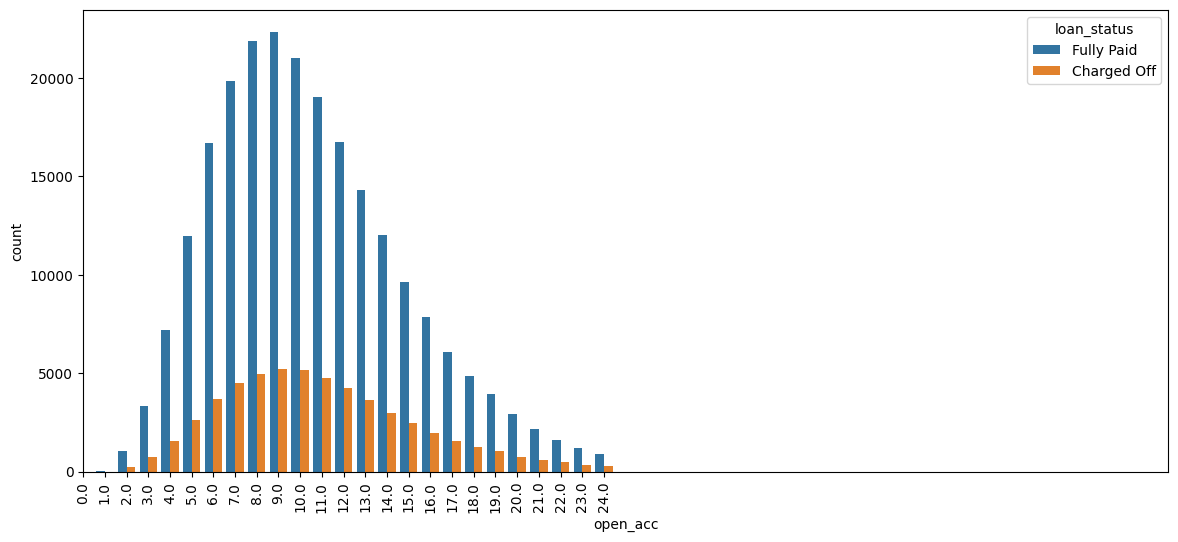

In [ ]:
#Countplot of categorical variable open_acc w.r.t. target variable loan_status
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='open_acc',hue='loan_status')
plt.xlim(left=0,right=50)
plt.xticks(rotation=90)
plt.show()

Observation:
* open_acc is fairly graphically normally distributed
* Charged Off and Fully Paid have the same distribution
* There is a significant difference in the "open_acc" feature value with respect to loan status. So it can be used to classify the loan status

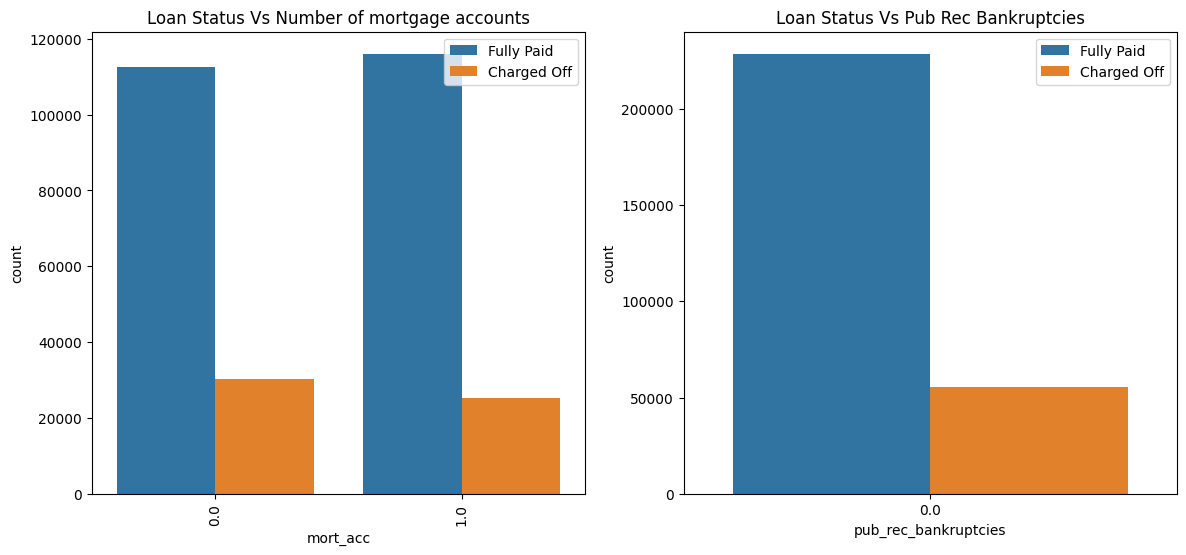

In [ ]:
#Countplot for various categorical features w.r.t. target variable loan_status

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='mort_acc',hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Status Vs Number of mortgage accounts')
plt.legend(loc=1)
plt.subplot(1,2,2)
sns.countplot(data=df, x='pub_rec_bankruptcies',hue='loan_status')
#plt.xlim(left=0,right=10)
plt.title('Loan Status Vs Pub Rec Bankruptcies')
plt.legend(loc=1)
plt.show()

Observation:
* There is a significant difference in the Number of mortgage accounts and Pub Rec Bankruptcies features' value with respect to loan status. So it can be used to classify the loan status

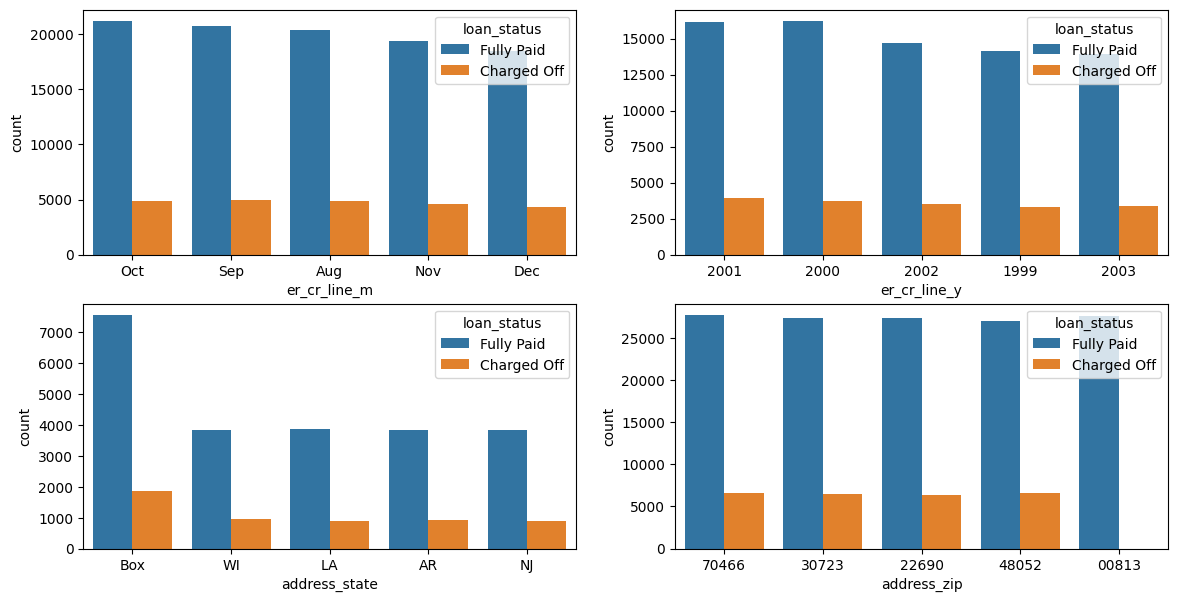

In [ ]:
#Countplots for categorical variables

top = 5
fig,axes = plt.subplots(2,2,figsize=(14,7))
sns.countplot(x= df['er_cr_line_m'],ax=axes[0,0],hue=df['loan_status'],order=df['er_cr_line_m'].value_counts().iloc[:top].index)
sns.countplot(x =df['er_cr_line_y'],ax=axes[0,1],hue=df['loan_status'],order=df['er_cr_line_y'].value_counts().iloc[:top].index)
sns.countplot(x =df['address_state'],ax=axes[1,0],hue=df['loan_status'],order=df['address_state'].value_counts().iloc[:top].index)
sns.countplot(x =df['address_zip'],ax=axes[1,1],hue=df['loan_status'],order=df['address_zip'].value_counts().iloc[:top].index)
plt.show()
#These features ('er_cr_line_m', 'er_cr_line_y', 'address_state', 'address_zip') are not significant for classification

#Data Preprocessing
1. Duplicate value checking

  * No duplicate value present

In [ ]:
df.duplicated().sum()

0

2. Missing value treatment

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
#Check for null values
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [ ]:
#Check for percentage of null values
round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
dti                     0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
purpose                 0.00
term                    0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

In [ ]:
#Missing Value Treatments upon analysis
#NaN values are replaced as below
df.loc[df['emp_title'].isna(),'emp_title'] = 'No Employee Title'
df.loc[df['emp_length'].isna(),'emp_length'] = 'Unavailable'
df.loc[df['title'].isna(),'title'] = 'Unavailable'
df.loc[df['revol_util'].isna(),'revol_util'] = 0.0
df.loc[df['mort_acc'].isna(),'mort_acc'] = 0.0
df.loc[df['pub_rec_bankruptcies'].isna(),'pub_rec_bankruptcies'] = 0.0

In [ ]:
df.isna().sum().sort_values(ascending=False)

loan_amnt               0
title                   0
pub_rec_bankruptcies    0
mort_acc                0
application_type        0
initial_list_status     0
total_acc               0
revol_util              0
revol_bal               0
pub_rec                 0
open_acc                0
earliest_cr_line        0
dti                     0
purpose                 0
term                    0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
emp_title               0
sub_grade               0
grade                   0
installment             0
int_rate                0
address                 0
dtype: int64

# Feature Engineering
## 1. Term

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
#converting the terms categorial feature to numerical
df.loc[df['term'] ==' 36 months', 'term'] = 36
df.loc[df['term'] ==' 60 months', 'term'] = 60
df['term'] = df['term'].astype('int64')

##2.Grade

In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
#converting the grade categorial feature to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['grade']= le.fit_transform(df['grade'])
df['grade'].unique()

array([1, 0, 2, 4, 3, 5, 6])

##3. Employment length in years

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       'Unavailable'], dtype=object)

In [ ]:
#converting the terms categorial feature to numerical
df.loc[df['emp_length'] =='10+ years', 'emp_length'] = 10
df.loc[df['emp_length'] =='< 1 year', 'emp_length'] = 0
df.loc[df['emp_length'] =='Unavailable', 'emp_length'] = 11
df.loc[df['emp_length'] =='1 year', 'emp_length'] = 1
df.loc[df['emp_length'] =='2 years', 'emp_length'] = 2
df.loc[df['emp_length'] =='3 years', 'emp_length'] = 3
df.loc[df['emp_length'] =='4 years', 'emp_length'] = 4
df.loc[df['emp_length'] =='5 years', 'emp_length'] = 5
df.loc[df['emp_length'] =='6 years', 'emp_length'] = 6
df.loc[df['emp_length'] =='7 years', 'emp_length'] = 7
df.loc[df['emp_length'] =='8 years', 'emp_length'] = 8
df.loc[df['emp_length'] =='9 years', 'emp_length'] = 9
df['emp_length'].unique()

array([10, 4, 0, 6, 9, 2, 3, 8, 7, 5, 1, 11], dtype=object)

## 4. Home ownership

In [ ]:
df['home_ownership']= le.fit_transform(df['home_ownership'])
df['home_ownership'].unique()

array([5, 1, 4, 3, 2, 0])

##5. Purpose

In [ ]:
df['purpose']= le.fit_transform(df['purpose'])
df['purpose'].unique()

array([12,  2,  1,  4, 11,  6,  9,  7, 13,  0,  8,  5,  3, 10])

##6. Issue date

In [ ]:
#Split issue_date into month and year
df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
df.drop(['issue_d'], axis=1, inplace=True)

<Axes: xlabel='issue_year', ylabel='count'>

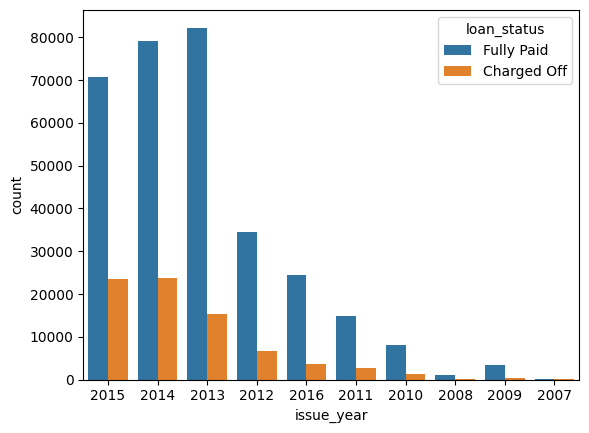

In [ ]:
sns.countplot(data=df, x='issue_year', hue='loan_status')

<Axes: xlabel='issue_month', ylabel='count'>

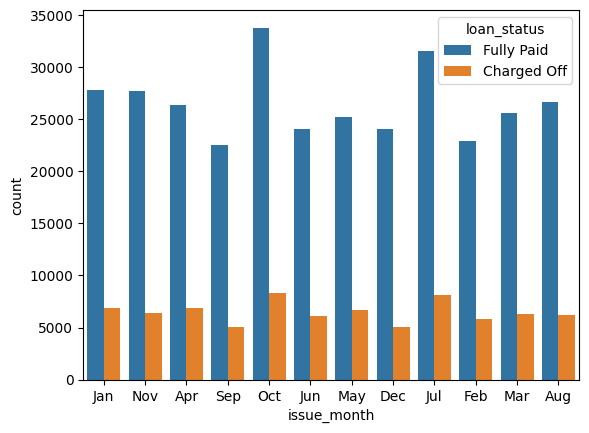

In [ ]:
sns.countplot(data=df, x='issue_month', hue='loan_status')

In [ ]:
#Perform Encoding
df.loc[df['pub_rec'] >= 1,'pub_rec'] = 1
df.loc[df['mort_acc'] >= 1, 'mort_acc'] = 1
df.loc[df['pub_rec_bankruptcies'] >= 1, 'pub_rec_bankruptcies'] = 1

In [ ]:
#Split er_cr_line date into month and year
df[['er_cr_line_m', 'er_cr_line_y']] = df['earliest_cr_line'].str.split('-', expand=True)
df.drop(['earliest_cr_line'], axis=1, inplace=True)

In [ ]:
#Split address into State and Zip code
df[['address_state', 'address_zip']] = df['address'].str.split(',', expand=True)[1].str.split(' ',expand=True)[[1,2]]
df.drop(['address'], axis=1, inplace=True)

In [ ]:
#Make emp_title and title as uppercase fields
df['emp_title'] = df['emp_title'].str.upper()
df['title'] = df['title'].str.upper()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,er_cr_line_m,er_cr_line_y,address_state,address_zip
0,10000.0,36,11.44,329.48,1,B4,MARKETING,10,5,117000.0,...,w,INDIVIDUAL,0.0,0.0,Jan,2015,Jun,1990,OK,22690
1,8000.0,36,11.99,265.68,1,B5,CREDIT ANALYST,4,1,65000.0,...,f,INDIVIDUAL,1.0,0.0,Jan,2015,Jul,2004,SD,05113
2,15600.0,36,10.49,506.97,1,B3,STATISTICIAN,0,5,43057.0,...,f,INDIVIDUAL,0.0,0.0,Jan,2015,Aug,2007,WV,05113
3,7200.0,36,6.49,220.65,0,A2,CLIENT ADVOCATE,6,5,54000.0,...,f,INDIVIDUAL,0.0,0.0,Nov,2014,Sep,2006,MA,00813
4,24375.0,60,17.27,609.33,2,C5,DESTINY MANAGEMENT INC.,9,1,55000.0,...,f,INDIVIDUAL,1.0,0.0,Apr,2013,Mar,1999,VA,11650


# Outliers Detection and treatment

In [ ]:
df1 = df.copy()

In [ ]:
#Removing some extreme outliers values for annual income
print(np.percentile(df['annual_inc'], 50))
print(np.percentile(df['annual_inc'], 99))
print(np.percentile(df['annual_inc'], 99.99))
print(round(df.loc[df['annual_inc'] > 210000.0].shape[0]/len(df),2)*100)
df = df.loc[~(df['annual_inc'] > np.percentile(df['annual_inc'], 99))]

64000.0
250000.0
1250000.0
2.0


In [ ]:
#Removing some extreme outliers values for pub_rec
print(np.percentile(df['pub_rec'], 50))
print(np.percentile(df['pub_rec'], 99))
print(np.percentile(df['pub_rec'], 99.99))
print(round(df.loc[df['pub_rec'] > 9.0].shape[0]/len(df),2)*100)
df = df.loc[~(df['pub_rec'] > np.percentile(df['pub_rec'], 99.99))]

0.0
1.0
1.0
0.0


In [ ]:
#Removing some extreme outliers values for pub_rec_bankruptcies
print(np.percentile(df['pub_rec_bankruptcies'], 50))
print(np.percentile(df['pub_rec_bankruptcies'], 99))
print(np.percentile(df['pub_rec_bankruptcies'], 99.99))
print(round(df.loc[df['pub_rec_bankruptcies'] > 5.0].shape[0]/len(df),2)*100)
df = df.loc[~(df['pub_rec_bankruptcies'] > np.percentile(df['pub_rec_bankruptcies'], 99.99))]

0.0
1.0
1.0
0.0


In [ ]:
#Define Outlier Detection function based on IQR and Percentile

def detect_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    outlier = df.loc[(df[col] < lb) | (df[col] > ub)]
    return round(outlier.shape[0]/df.shape[0]*100,2)

def detect_outliers_percentile(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    p = np.percentile(df[col],99.99)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    outlier = df.loc[(df[col] < lb) | (df[col] > p)]
    return round(outlier.shape[0]/df.shape[0]*100,2)

In [ ]:
#Print percentage of outliers for each cont. variable
print(f"Outlier Percentage")
print(f"loan_amnt            = {detect_outliers(df,'loan_amnt')}%")
print(f"int_rate             = {detect_outliers(df,'int_rate')}%")
print(f"installment          = {detect_outliers(df,'installment')}%")
print(f"annual_inc           = {detect_outliers(df,'annual_inc')}%")
print(f"dti                  = {detect_outliers(df,'dti')}%")
print(f"open_acc             = {detect_outliers(df,'open_acc')}%")
print(f"pub_rec              = {detect_outliers_percentile(df,'pub_rec')}%")
print(f"revol_bal            = {detect_outliers(df,'revol_bal')}%")
print(f"revol_util           = {detect_outliers(df,'revol_util')}%")
print(f"total_acc            = {detect_outliers(df,'total_acc')}%")
print(f"mort_acc             = {detect_outliers(df,'mort_acc')}%")
print(f"pub_rec_bankruptcies = {detect_outliers(df,'pub_rec_bankruptcies')}%")

Outlier Percentage
loan_amnt            = 0.05%
int_rate             = 0.95%
installment          = 2.84%
annual_inc           = 4.22%
dti                  = 0.07%
open_acc             = 2.6%
pub_rec              = 0.0%
revol_bal            = 5.37%
revol_util           = 0.0%
total_acc            = 2.15%
mort_acc             = 0.0%
pub_rec_bankruptcies = 11.39%


#Outliers Treatment

In [ ]:
#Define function to remove outliers based on IQR

def remove_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    return df.loc[~((df[col] < lb) | (df[col] > ub))]

In [ ]:
#Remove outliers from cont. variables mentioned below
df = remove_outliers(df, 'loan_amnt')
df = remove_outliers(df, 'int_rate')
df = remove_outliers(df, 'installment')
df = remove_outliers(df, 'annual_inc')
df = remove_outliers(df, 'dti')
df = remove_outliers(df, 'pub_rec')
df = remove_outliers(df, 'revol_bal')
df = remove_outliers(df, 'revol_util')
df = remove_outliers(df, 'open_acc')
df = remove_outliers(df, 'total_acc')
df = remove_outliers(df, 'mort_acc')
df = remove_outliers(df, 'pub_rec_bankruptcies')

#Data Preparation for ML

In [ ]:
df1 = df.copy()

In [ ]:
#Drop the variables which didn't show any significant impact on loan_status in above analysis

df1.drop(['emp_title','issue_month', 'issue_year', 'er_cr_line_m', 'er_cr_line_y','address_state','address_zip','application_type','verification_status'
          ,'purpose','title','sub_grade','dti','revol_bal'],axis=1,inplace=True)

In [ ]:
#Binary encode target variable loan_status
loan_status_dict = {'Fully Paid':1,  'Charged Off':0}
df1['loan_status'] = df1['loan_status'].map(loan_status_dict)

In [ ]:
#Binary encode target variable loan_status
initial_list_status_dict = {'w':1,  'f':0}
df1['initial_list_status'] = df1['initial_list_status'].map(initial_list_status_dict)

In [ ]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,open_acc,pub_rec,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,1,10,5,117000.0,1,16.0,0.0,41.8,25.0,1,0.0,0.0
1,8000.0,36,11.99,265.68,1,4,1,65000.0,1,17.0,0.0,53.3,27.0,0,1.0,0.0
2,15600.0,36,10.49,506.97,1,0,5,43057.0,1,13.0,0.0,92.2,26.0,0,0.0,0.0
3,7200.0,36,6.49,220.65,0,6,5,54000.0,1,6.0,0.0,21.5,13.0,0,0.0,0.0
4,24375.0,60,17.27,609.33,2,9,1,55000.0,0,13.0,0.0,69.8,43.0,0,1.0,0.0


# Build ML model

In [ ]:
#Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split

In [ ]:
#Prepare X and y dataset i.e. independent and dependent datasets

X = df1.drop(['loan_status'], axis=1)
y = df1['loan_status']

In [ ]:
#Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228244, 15)
(57062, 15)
(228244,)
(57062,)


In [ ]:
#Standardize the data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
#Fit the Model on training data

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predit the data on test dataset

y_pred = model.predict(X_test)

In [ ]:
print(f'Logistic Regression Model Score: ',end='')
print(round(model.score(X_test, y_test)*100,2))

Logistic Regression Model Score: 80.82


In [ ]:
#Try with different regularization factor lamda and choose the best to build the model

lamb = np.arange(0.01, 10000, 100)

train_scores = []
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)

    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)

    train_scores.append(tr_score)
    test_scores.append(te_score)

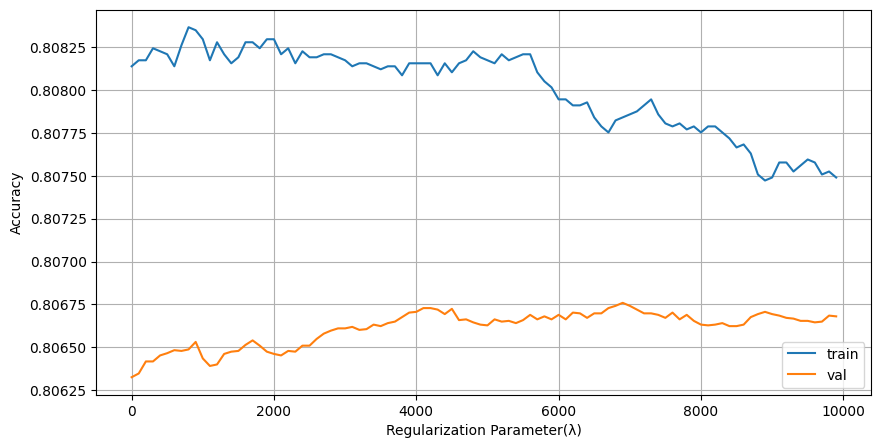

In [ ]:
#Plot the train and test scores with respect lambda values i.e. regularization factore

plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 10000.0, 100)), test_scores, label="train")
plt.plot(list(np.arange(0.01, 10000.0, 100)), train_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
#Check the index of best test score and the check the best test score

print(np.argmax(test_scores))
test_scores[12]

8


0.8082787143808489

In [ ]:
#Calculate the best lambda value based on the index of best test score

best_lamb = 0.01 + 100*8

In [ ]:
#Fit the model using best lambda

model = LogisticRegression(C=1/best_lamb)
model.fit(X_train, y_train)

LogisticRegression(C=0.0012499843751953101)

In [ ]:
#Predict the y_values and y_probability values

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
#Print model score

print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(model.score(X_test, y_test)*100,2))

Logistic Regression Model Score with best lambda: 80.84


In [ ]:
#Collect the model coefficients and print those in dataframe format
coeff_df = pd.DataFrame()
coeff_df['Coefficients'] = X_train.columns
coeff_df['Weights'] = model.coef_[0]
coeff_df['ABS_Weights'] = abs(coeff_df['Weights'])

In [ ]:
#Sort the coeff in the order of their importance
coeff_df = coeff_df.sort_values(['ABS_Weights'], ascending=False)

Weights of features (coefficients)

In [ ]:
#Display variable weights

coeff_df

,Coefficients,Weights,ABS_Weights
4,grade,-0.334842,0.334842
7,annual_inc,0.276090,0.276090
1,term,-0.195525,0.195525
8,open_acc,-0.149745,0.149745
2,int_rate,-0.148270,0.148270
6,home_ownership,-0.113119,0.113119
10,revol_util,-0.098373,0.098373
11,total_acc,0.064202,0.064202
3,installment,-0.053752,0.053752
0,loan_amnt,-0.046222,0.046222


In [ ]:
#Top 5 important features

coeff_df.head(5)

,Coefficients,Weights,ABS_Weights
4,grade,-0.334842,0.334842
7,annual_inc,0.276090,0.276090
1,term,-0.195525,0.195525
8,open_acc,-0.149745,0.149745
2,int_rate,-0.148270,0.148270


In [ ]:
#Logistic Regression model intercept

model.intercept_

array([1.58034739])

Confusion Matrix

In [ ]:
#Create confusion matrix and print the matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

In [ ]:
cm_df

,0,1
0,622,10397
1,538,45505


Class 0 : Charged Off (Here considering as negative class)

Class 1 : Fully Paid (Here considering as positive class)

* TN = 622
* TP = 45505
* FP = 10397
* FN = 538
Actual Negative (Charged Off) = 622 + 10397  = 11019
Actual Positive (Fully Paid) = 538 + 45505 = 46043
Predicted Negative (Charged Off) = 622+ 538 = 1160
Predicted Positive (Fully Paid) = 10397 + 45505 = 55902

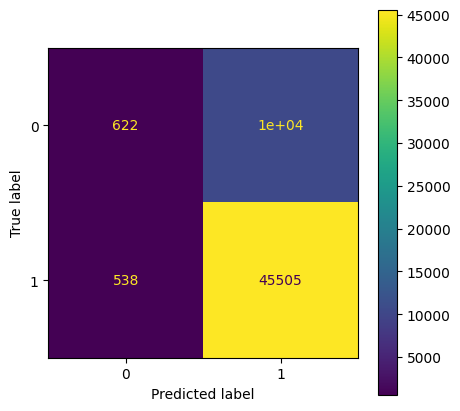

In [ ]:
#Plot Confusion Matrix using different method
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(cm).plot(ax=ax);
plt.show()

Classification Report

In [ ]:
#Print classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.06      0.10     11019
           1       0.81      0.99      0.89     46043

    accuracy                           0.81     57062
   macro avg       0.68      0.52      0.50     57062
weighted avg       0.76      0.81      0.74     57062



Observations from classification report:

* Precision : 0.81
* Recall : 0.99
* F1-score : 0.89
* Accuracy : 0.81

In [ ]:
print('Precision Score:', precision_score(y_test,y_pred).round(2))
print('Recall Score:', recall_score(y_test,y_pred).round(2))
print('F1 Score:', f1_score(y_test,y_pred).round(2))

Precision Score: 0.81
Recall Score: 0.99
F1 Score: 0.89


ROC AUC Curve

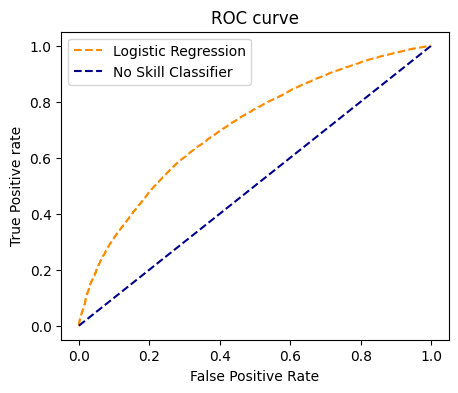

In [ ]:
#Plot ROC curve
#ROC Curve summarizes trade off between TPR and FPR

random_probs = [0 for i in range(len(y_test))]

p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, linestyle='--',color='darkorange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='darkblue', label='No Skill Classifier')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:,1]).round(2)

0.71

#Tradeoff Questions:
How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Observations:

* Area under the ROC curve = 71%.
* Ideal scenario would be more TPR and lower FPR
* Plot shows that True Positives increase at the cost of generating more False Positives
* That means in order to find more Fully Paid customers, the model will have more chances of mistakenly classifying Charged Off customers as Fully Paid customers which might result in NPAs.
* To avoid the NPAs, there is a necessity of bringing down the FPR while keeping the TPR in shape.
* The model can detect the real defaulters when FPs (False Positives) are pushed towards left on x-axis
* Once FPs (False Positives) towards left on X-axis the AUC will increase and hence the model performance
* While FPs are moved towards left on X-axis, TPs need to remain high there on Y-axis

# Precision Recall Curve

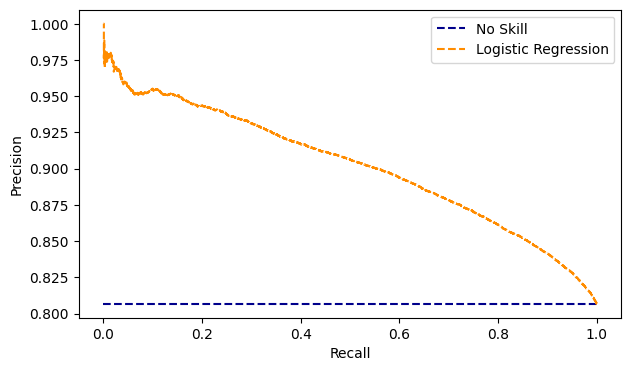

In [ ]:
#Plot precision recall curve
#Reviewing both precision and recall is useful in cases where there is an imbalance in the observations
#between the two classes.

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(7,4))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='darkblue')
plt.plot(recall, precision, linestyle='--', label='Logistic Regression', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [ ]:
auc(recall, precision).round(3)

0.902

Question: Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

Observations:

* Precision recall curve is more useful in case of imbalanced data.
* Calculation of precision and recall do not make use of the true negatives. So, it focuses on the correct prediction of one of the class. In our case that class is Class 1 i.e. Fully Paid customers
* If you see the confusion matrix, the upper left box just won't be used in these calculations.
* AUC = 90.2% which is fairly good.
* We can see that as the recall increases the precision is falling down.
* For a strong model, both the recall and precision should be high
* For a good trade off the precision needs to stay high on y-axis as recall progress towards right on x-axis
* This shows that in order to increase the performance of model, precision needs to be improved
* Increase precision means, there needs to be low FPs (False Positives)
So, here we need to focus more on reducing the FPs

# Extra analysis for questionaire and recommendations

Questionnaire

1. What percentage of customers have fully paid their Loan Amount?

In [ ]:
round(df[df['loan_status']=="Fully Paid"].shape[0]/df.shape[0]*100,2)

80.53

2. Comment about the correlation between Loan Amount and Installment features.

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['loan_amnt'],df['installment'])
print('Pearsons correlation: %.2f' % corr)
from scipy.stats import spearmanr
corr, _ = spearmanr(df['loan_amnt'],df['installment'])
print('Spearman correlation: %.2f' % corr)

Pearsons correlation: 0.95
Spearman correlation: 0.96


Loan amount and installment has very strong positive correlation

3. The majority of people have home ownership as MORTGAGE (46.97%)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    133368
RENT        123635
OWN          26835
OTHER          102
NONE            24
ANY              2
Name: home_ownership, dtype: int64

In [ ]:
round(df['home_ownership'].value_counts()[0]/len(df)*100,2)

46.97

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F) T (True ) 93.66 % of grade 'A' had fully paid the loan

In [ ]:
dfl = df[df['loan_status']=="Fully Paid"]
dfl['grade'].value_counts()

B    74555
C    58376
A    46551
D    31278
E    13344
F     4334
G      250
Name: grade, dtype: int64

In [ ]:
round(df.loc[(df['grade']=='A') & (df['loan_status']=="Fully Paid")].shape[0]/df[df['grade']=='A'].shape[0]*100,2)

93.66

5. Name the top 2 afforded job titles.

*         
* TEACHER
* MANAGER  

In [ ]:
df['emp_title'].value_counts()

NO EMPLOYEE TITLE            15545
TEACHER                       3912
MANAGER                       3822
SUPERVISOR                    1822
REGISTERED NURSE              1789
                             ...  
AHOLDUSA                         1
OUTSIDE PLANT TECHNICIAN         1
WILMAR ELECTRIC                  1
ACTIVE FOAM PRODUCTS INC.        1
GRACON SERVICES, INC             1
Name: emp_title, Length: 121795, dtype: int64

6. Thinking from a bank's perspective, which metric should our primary focus be on..
* ROC AUC
* Precision
* Recall
* F1 Score

Bank's primary focus should be on ROC AUC as bank needs to reduce FPR (False Positive Rate) and needs to increase the TPR (True Positive Rate).


7. How does the gap in precision and recall affect the bank?

* A perfect precision recall curve is depicted as a point (1,1).
* High performance model is represented by a curve that bows towards point (1,1) above the flat line of no skill.
*So, the gap between precision and recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.
* Good precision means less False Positives. i.e. Less NPA loan accounts.
* Good recall means less False Negatives. i.e. not loosing on good customer.

8. Which were the features that heavily affected the outcome?

Top 5 Features that affected the outcome are -

1. Grade
2. Term
3. Annual income
4. dti
5. int_rate

9. Will the results be affected by geographical location? (Yes/No)
Answer: No. The results will not be affected by the geographical locaion. See the bar graph plotted above.

<Axes: xlabel='address_state', ylabel='count'>

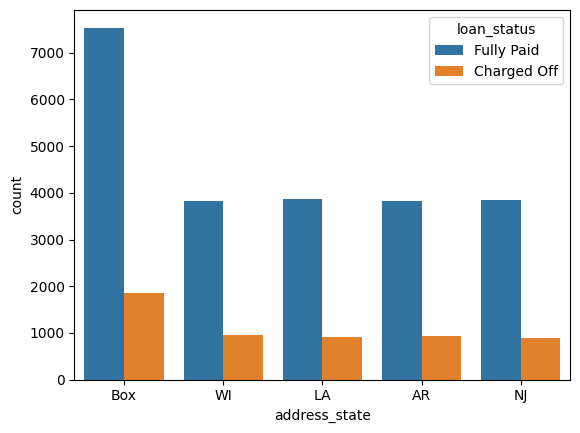

In [ ]:
top =5
sns.countplot(x =df['address_state'],hue=df['loan_status'],order=df['address_state'].value_counts().iloc[:top].index)

#Logistic Regression using StatsModel

In [ ]:
#Import Library
import statsmodels.api as sm

In [ ]:
X_sm = X.copy()
y_sm = y.copy()

In [ ]:
X_sm.shape, y_sm.shape

((265768, 16), (265768,))

In [ ]:
#To address LinAlgError : Singular Matrix in Logit.fit()

print(X_sm['pub_rec'].value_counts())
print(X_sm['pub_rec_bankruptcies'].value_counts())
X_sm = X_sm.drop(['pub_rec','pub_rec_bankruptcies'],axis=1)

0.0    265768
Name: pub_rec, dtype: int64
0.0    265768
Name: pub_rec_bankruptcies, dtype: int64


In [ ]:
#Split data into train and test

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
X_sm_train.shape, y_sm_train.shape, X_sm_test.shape, y_sm_test.shape

((212614, 14), (212614,), (53154, 14), (53154,))

In [ ]:
#Standardize the data

scaler = StandardScaler()
scaler.fit(X_sm_train)
X_sm_train = scaler.transform(X_sm_train)
X_sm_test = scaler.transform(X_sm_test)
X_sm_train = pd.DataFrame(X_sm_train, columns=X_sm.columns)
X_sm_test = pd.DataFrame(X_sm_test, columns=X_sm.columns)

In [ ]:
#Bring the data in correct shape to be accepted by Logit model

y_sm_train = np.asarray(y_sm_train).reshape(-1,1)
y_sm_train = pd.DataFrame(y_sm_train,columns=['loan_status'])

In [ ]:
#Train the model

log_reg = sm.Logit(y_sm_train,X_sm_train).fit(maxiter=50)

Optimization terminated successfully.
         Current function value: 0.666127
         Iterations 5


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               212614
Model:                          Logit   Df Residuals:                   212600
Method:                           MLE   Df Model:                           13
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:                 -0.3587
Time:                        19:45:14   Log-Likelihood:            -1.4163e+05
converged:                       True   LL-Null:                   -1.0424e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan_amnt          0.0751      0.034      2.188      0.029       0.008       0.142
term              -0.1851      0.012    -14.979      0.000      -0.209      -0.161
int_rate          -0.0014      0.015

Observations:

1.As we see the model did not converged and results are not that assuring
2. We are not trying with more iterations as it is time consuming and we have already implemented the model with sklearn

In [ ]:
y_sm_pred = log_reg.predict(X_sm_test)

In [ ]:
y_sm_pred = list(map(round, y_sm_pred))

In [ ]:
cm_sm = confusion_matrix(y_sm_test, y_sm_pred)
cm_sm_df = pd.DataFrame(cm_sm, index=np.unique(y_sm_test), columns=np.unique(y_sm_test))

In [ ]:
cm_sm_df

,0,1
0,7338,3030
1,17484,25302


Business Insights & Recommendations

Insights
* There is a high correlation between installment and loan amount. Except for the above, there is not much correlation between features
* Installment, pub_rec,  revol_util, and total_acc features can be used to classify the loan status
* The loan fully paid percentage is higher for 36 months than for 60 months. So it is better to give 36 months repayment duration
* The first four grade (A, B, C, D) has the major category of loan borrower
* Sub-grade category must not influence loan status
* "Rent" and mortgage" are major home ownership category
* Verification status has no influence on the loan status
* 91.6% of purpose of loan includes debt_consolidation, credit_card, home_improvement, other category
* 99.8% of application type is individual
* 10+ years employment category people contributed to the major share of the fully paid loan category
* So, the categorial features term, grade, home ownership, verification, purpose, employment years fluence the loan status
* The median interest rate of Charged Off customers is significantly higher than that of Fully Paid
* Median annual income of Charged Off customers is lower than that of Fully Paid. So annual income feature can be used to classify the loan status
* Median EMI of Charged Off is higher than those of Fully Paid
* Median loan amount of Charged Off is higher than those of Fully Paid
* There is a significant difference in the "initial_list_status" feature value with respect to loan status. So, it can be used to classify the loan status
* open_acc is fairly graphically normally distributed
* Charged Off and Fully Paid have the same distribution
* There is a significant difference in the "open_acc" feature value with respect to loan status. So, it can be used to classify the loan status
* There is a significant difference in the Number of mortgage accounts and Pub Rec Bankruptcies features' value with respect to loan status. So, it can be used to classify the loan status

Recommendations

* Customers with Grade A are the most reliable on the repayments. The bank can extend the credit line to these customers and should focus and adding more new customers to the list of borrowers. 93% of these have a track record of repaying their loan.

* The term period of 60 months is a trouble when it comes to charged-off accounts. 32% of accounts from the 60-month term period turned into NPA based on the data available. So, here need to rethink the repayment terms.36-month repayment term needs to be preferred by the bank.

* The median annual income of Charged Off customers is 59K which is 6K less than the median annual income of Fully Paid customers (65K). Please revisit the annual income thresholds while extending the credit lines to the customers.

* The median DTI ratio of Charged Off customers is 19.34 which is 3 points higher than the fully paid customers. Please give it a thought. This feature tops in the first 5 most impactful features.

* 37% of the grade E and 28% of the grade D customers are Charged off status from historical data. The needs to be more stringent criteria and the grade E and D customers.

* The median interest rates of defaulter customers are 2.62% higher than those of regular.
* The median interest rate of regular customers is 12.99% and for defaulters, it's found that the median interest rate is 15.61%. If the customer interest rates crawl above the alarming thresholds then that account is more probably more prone to become an NPA

* Apart from this, the bank needs to focus more on improving the precision of correctly identifying the Charged Off customer. Because the current historical data trend shows that the bank is not so accurate in classifying the Charged Off customers. However, these customers often get the green pass as a result of high FPR (False Positive Rate).
